In Sturm-Liouville eigenvalue problems, thee form of equation that we are interested in is:
\begin{aligned} -\left(p\left(x\right)y'\left(x\right)\right)'+q\left(x\right)y\left(x\right)=\lambda r\left(x\right)y\left(x\right)=0,\ 0<x<1 \end{aligned}

The one-dimensional Schrodinger Equation is:

\begin{aligned}
-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V\psi=E\psi
\end{aligned}

Rewriting the above in Lagrange's Notation:
\begin{aligned} \psi''\left(x\right)+\frac{2m}{\hbar^2}\left[E-V\left(x\right)\right]\psi\left(x\right)=0 \end{aligned}

Which tells us that $p\left(x\right)=1$, $q\left(x\right)=\frac{2m}{\hbar^2}\left[E-V\left(x\right)\right]$ and $r\left(x\right)=0$

To start off, we import the required libraries:

In [448]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.grid'] = True
#plt.style.use(['dark_background'])
from matplotlib.animation import FuncAnimation
from scipy.optimize import fsolve

For simplicity's sake, we create the scenario for the finite square potential well and learn of the three regions of interest:

\begin{aligned}
E-V\left(x\right) &= 0 \\
E-V\left(x\right) &> 0 \\
E-V\left(x\right) &< 0 \\
\end{aligned}

Let's plot the graph:

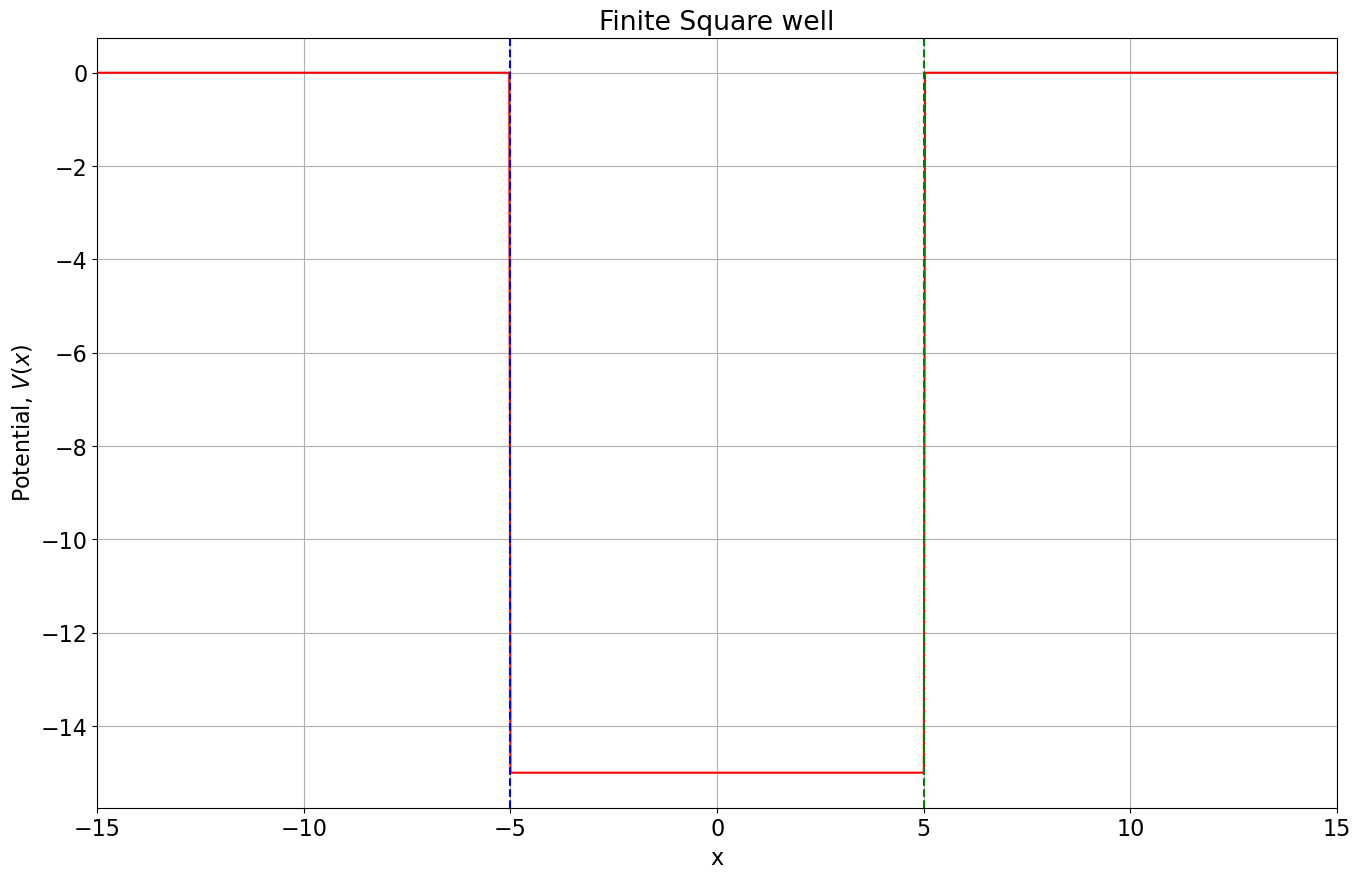

In [ ]:
# Boundaries of the well
a = -5 # Left boundary
b = 5 # Right boundary
h_0 = - 15 # The depth of the well
h_1 = 0 # The height of the well

# defining the potential well (symmetric)
def pot_well (x, a, b):
    return np.piecewise(x, [x < a, (x >= a) & (x <= b), x > b], [h_1, h_0, h_1])

# Calculate the midpoint of the well
mid = (a + b) / 2

# Define x such that the midpoint of the well is at the center
x = np.linspace(mid - 3 * np.abs(a) , mid + 3 * np.abs(b), 1000)

plt.plot(x, pot_well(x, a, b), color = 'red')
plt.axvline(x = a, color = 'blue', linestyle = '--', label = f'Left Boundary, x = {a}')
plt.axvline(x = b, color = 'green', linestyle = '--', label = f'Right Boundary, x = {b}')
plt.title('Finite Square well')
plt.xlabel('x')
plt.xlim(mid - 3 * np.abs(a), mid + 3 * np.abs(b))
plt.ylabel('Potential, $V(x)$')
#plt.ylim(h_0, np.abs(h_0))
#plt.legend()
#plt.tight_layout()
plt.show()

For the region $x<-a=-5$ and $x>b=5$, where $E-V\left(x\right)<0$, the Schrodinger equation will read:
\begin{aligned} \psi''\left(x\right)=\frac{2m}{\hbar^2}\left[E-V\left(x\right)\right]\psi\left(x\right) \end{aligned}

With its solution being:
\begin{aligned}\psi_1(x)&=Ae^{\frac{\sqrt{2m\left(V\left(x\right)-E\right)}}{\hbar} x}, &&x<-a\\
\psi_3(x)&=Ae^{-\frac{\sqrt{2m\left(V\left(x\right)-E\right)}}{\hbar} x}, &&x>b\\
\end{aligned}

For the middle region, we have the solution $\psi_2\left(x\right)=A\sin{(kx)}+B\cos{(kx)}, -a<x<b$.

The factor that determines our splitting of section is by looking at when will $E-V\left(x\right)$ be zero, which we will call the turning points. For example, our first turning point is $-a$ and $b$ will therefore be the 2nd turning point. This can also be observed by the number of points that our specified value of $E$ that will intersect the potential.

However, when we are not capable of solving a potential analytically, we can implement numerical methods. Here we introduce the Numerov Method, which is a iteration method that gives error of 6th order $O\left(\delta x^6\right)$:

We have the Schrodinger Equation:
\begin{aligned}\psi''\left(x\right)+\frac{2m}{\hbar^2}\left[E-V\left(x\right)\right]\psi\left(x\right)&=0 \\
\psi''\left(x\right)&=-k^2\left(x\right)\psi\left(x\right)
\end{aligned}

where we absorbed $\begin{aligned} \frac{2m}{\hbar^2}\end{aligned}\left[E-V\left(x\right)\right]$ into $k^2\left(x\right)$.

It should be noted that $E\ge V_0$ for the function to be normalised.

Discretising the variable, $x$, and applying the three point finite difference to approximate the second derivative:
\begin{aligned}\psi''\left(x\right)\approx\frac{\psi\left(x_{i+1}\right)-2\psi\left(x_{i}\right)+\psi\left(x_{i-1}\right)}{h^2}-\frac{h^2}{12}\psi^{\left(4\right)}\left(x\right)\end{aligned}

To improve our order of accuracy, we differentiate the Schrodinger Equation two more times, and substituting back in the finite difference formula:
\begin{aligned}\psi^{\left(4\right)}\left(x\right)=-\left(k^2\left(x\right)\psi\left(x\right)\right)'' \end{aligned}

From there, we obtain:
\begin{aligned}\psi''\left(x\right)\approx\frac{\psi\left(x_{i+1}\right)-2\psi\left(x_{i}\right)+\psi\left(x_{i-1}\right)}{h^2}+\frac{k^2\left(x_{i+1}\right)\psi\left(x_{i+1}\right)-2k^2\left(x_{i}\right)\psi\left(x_{i}\right)+k^2\left(x_{i-1}\right)\psi\left(x_{i-1}\right)}{12}\end{aligned}

Isolating the $\psi\left(x_{i+1}\right)$ term:
\begin{aligned}\psi\left(x_{i+1}\right)=\frac{\psi\left(x_{i}\right)\left(2+\frac{5}{6}h^2k^2\left(x_{i}\right)\right)-\psi\left(x_{i-1}\right)\left(1-\frac{1}{12}h^2k^2\left(x_{i-1}\right)\right)}{1-\frac{1}{12}h^2k^2\left(x_{i+1}\right)} \end{aligned}

Therefore, from the iteration formula, we require the first two points of the wavefunction. Fortunately, we can just set an arbitrary point, effectively far away from the region of the potential, and set it to be zero.

For the second point, we can just put an arbitrarily small number (say, $1\times 10^{-10}$) and iterate from there.

Now, we consider the following potential well, with a particle bound in it:

\begin{aligned}V\left(x\right)=\frac{\hbar^2}{2m}\alpha^2\lambda\left(\lambda-1\right)\left[\frac 1 2-\frac{1}{\cosh^2{\left(\alpha x\right)}}\right]\end{aligned}

where $\alpha$ and $\lambda$ are given parameters.
The graph with $\alpha=1$ and $\lambda=4$ is as shown:

Plugging in the parameters:

In [651]:
hbar = 1
m = 1
alpha = 1
lambda1 = 4
#omega = 1 #Testing for harmonic oscillator, if the reader wishes to test

# Main definition of Potential
def V(x):
    return hbar ** 2 / (2 * m) * (alpha ** 2) * lambda1 * (lambda1 - 1) * (0.5 - 1 / (np.cosh(alpha * x)) ** 2)
    #return 0.5 * m * omega ** 2 * x ** 2 #Testing for harmonic oscillator, if the reader wishes to test

Plotting of the potential,

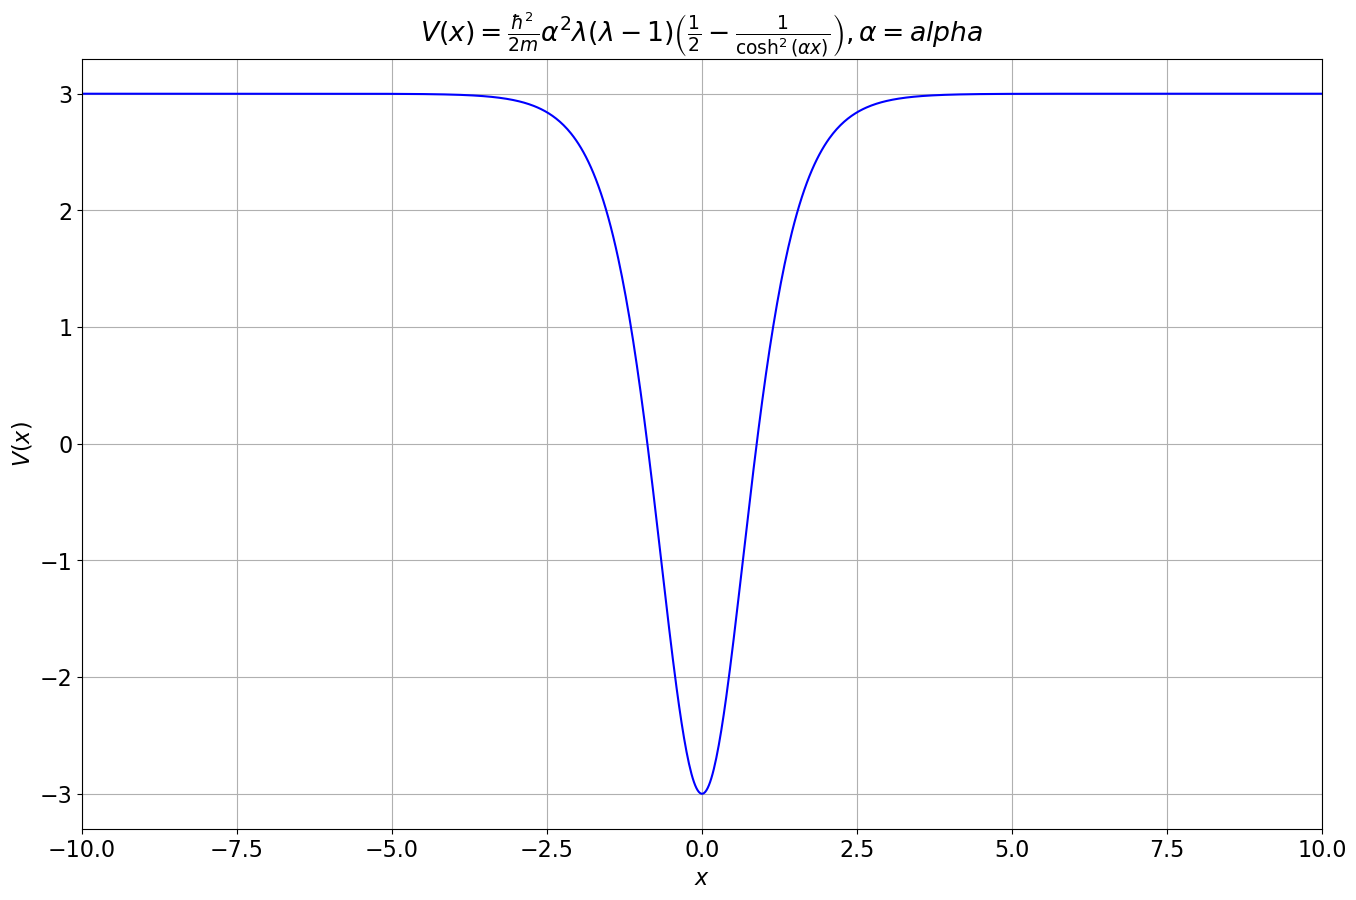

In [652]:
x = np.linspace(-10 / alpha, 10 / alpha, 1000)

plt.plot(x, V(x), color='blue')
plt.xlim(-10 / alpha, 10 / alpha)
plt.title(r'$V(x)=\frac{\hbar^2}{2m} \alpha^2 \lambda(\lambda-1)\left(\frac{1}{2}-\frac{1}{\cosh^2(\alpha x)}\right), \alpha = {alpha}$')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.show()

The given eigenvalues are in the form:

\begin{aligned}E_n=\frac{\hbar^2}{2m}\alpha^2\left[\frac{\lambda\left(\lambda-1\right)}{2}-\left(\lambda-1-n\right)^2\right], n = 0, 1, 2, 3, \dots \end{aligned}

with the first 10 eigenvalues as shown below:

In [668]:
# Printing the first 10 eigenvalues in a table
n = 10
def Eval_exact(hbar, m, alpha, lambda1, n):
    return hbar ** 2 / (2 * m) * alpha ** 2 * (lambda1 * (lambda1 - 1) / 2 - (lambda1 - 1 - n) ** 2)
    #return (n + 0.5) * hbar * omega
data = []
for i in range(n):
    data.append(Eval_exact(hbar, m, alpha, lambda1, i))
    
df = pd.DataFrame(data, columns = ['Eigenvalues'])
df.index = np.arange(0, n)
print(df)

   Eigenvalues
0         -1.5
1          1.0
2          2.5
3          3.0
4          2.5
5          1.0
6         -1.5
7         -5.0
8         -9.5
9        -15.0


First, we make a guess for the eigenvalues, $E$:

In [654]:
E_x = 2.5

The turning point is where $E=V(x)$.

To find the turning point, we use Bisection Method:

In [655]:
# Define the bisection method
def b_m(f, a, b, E_x, tol, max_iter):
    if f(a, E_x) * f(b, E_x) > 0:
        raise ValueError('Function has same signs at both endpoints of the interval.')
    i = 1
    while (b - a) / 2 > tol and i < max_iter:
        c = (a + b) / 2
        fc = f(c, E_x)
        if fc * f(a, E_x) < 0:
            b = c
        elif fc * f(b, E_x) < 0:
            a = c
        elif fc == 0:  # Exact root found
            return c, i
        i += 1

    # Final midpoint and iteration count
    c = (a + b) / 2
    return c, i

# Function for turning points (E - V(x))
def f(x, E_x):  # f(x) = E - V(x)
    return E_x - V(x)

# Debugging helper: Check function values
def debug_bracketing(f, a, b, E_x):
    fa = f(a, E_x)
    fb = f(b, E_x)
    print(f"f(a={a}) = {fa}, f(b={b}) = {fb}")
    if fa * fb > 0:
        print("No root is bracketed in the given interval. Adjust 'a' and 'b'.")
    return fa, fb

# Parameters
a = 0
b = 15 / alpha
tol = 1e-15
max_iter = 1000

# Debugging: Check initial bracketing
fa, fb = debug_bracketing(f, a, b, E_x)
if fa * fb > 0:
    raise ValueError("Adjust the range [a, b] to bracket the root.")

# Finding the root
right_root, iterations = b_m(f, a, b, E_x, tol, max_iter)
left_root = -right_root # Note: only for symmetric potentials

print("Approximate left root:", left_root)
print("Approximate right root:", right_root)
print("Number of iterations:", iterations)

f(a=0) = 5.5, f(b=15.0) = -0.49999999999775424
Approximate left root: -1.9140842356665502
Approximate right root: 1.9140842356665502
Number of iterations: 54


Therefore the root is found by bisection method. Note that the trick of multiplying a negative sign on the root we found is only valid for symmetric potentials, mirrored at $x=0$.

For a much simpler method of finding the root, we use the built in fsolve function:

In [656]:
def g(x):
    return E_x - V(x)
aroot = fsolve(g, -1)
print(aroot)

[-1.91408424]


In [657]:
# Setting the coordinates for the shooting method
midpoint = (right_root + left_root) / 2
width = (right_root - left_root) / 2

x_far_left = midpoint - 10 * width # Far left side, psi approaches to zero
x_1st_turning_point = left_root # First turning point
x_2nd_turning_point = right_root # Second turning point
x_far_right = midpoint + 10 * width # Far right side , psi approaches to zero

y_far_left, y_far_right = 0, 0 # Initial values

Based on the value of root,  we plot for the intersection of $V=E$ and $V=V\left(x\right)$

The roots are our turning points. Choosing the leftmost and rightmost boundary as our starting point:

(Note that it should be effectively far away from the potential)

In [658]:
n = 20000 # Number of steps
h = (x_far_right - x_far_left) / n # Step size
x = np.linspace(x_far_left, x_far_right, n + 1)
print ((x_1st_turning_point - x_far_left) / h)

9000.0


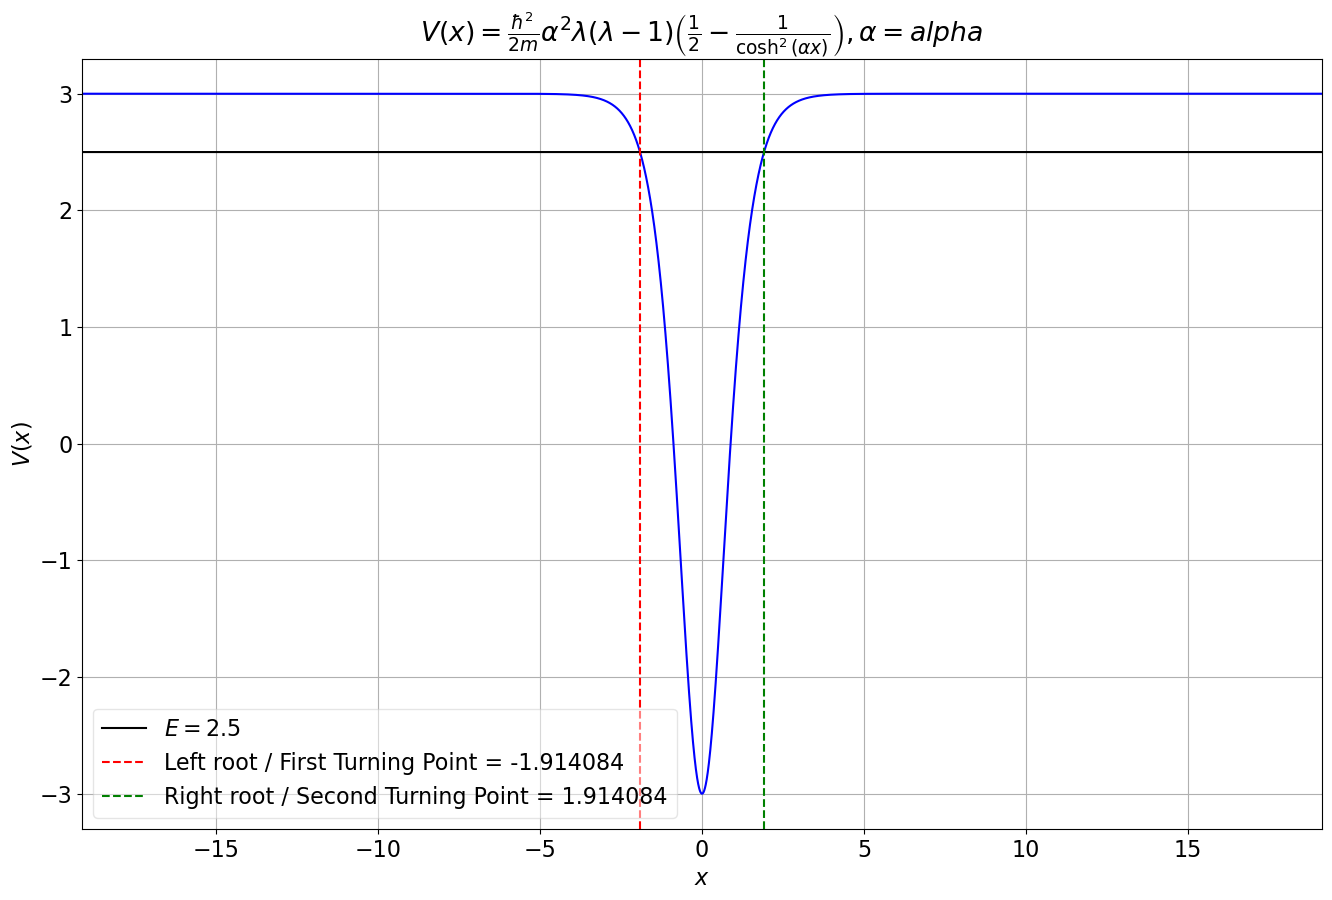

In [659]:
def E(x):
    return 0 * x + E_x

plt.plot(x, V(x), color='blue')
plt.plot(x, E(x), color='black', label=f'$E = {E_x}$')
plt.axvline(left_root, linestyle='--', color='red', label=f'Left root / First Turning Point = {left_root:.6f}')
plt.axvline(right_root, linestyle='--', color='green',  label=f'Right root / Second Turning Point = {right_root:.6f}')
plt.xlim(x_far_left, x_far_right)
plt.title(r'$V(x)=\frac{\hbar^2}{2m} \alpha^2 \lambda(\lambda-1)\left(\frac{1}{2}-\frac{1}{\cosh^2(\alpha x)}\right), \alpha ={alpha}$')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.legend()
plt.legend(framealpha=0.5, frameon=True)
plt.show()

Checking the values of the graph (Remove the #print(df)):

In [660]:
# Discretise the potential equation
def k_squared(E_x, V):
    return -2 * m / hbar ** 2 * (E_x - V)

pd.options.display.float_format = '{:.6f}'.format
# Tabulate the results
data = []
for i in range(n + 1):
    data.append([x[i], V(x[i]), k_squared(E_x, V(x[i]))])
df = pd.DataFrame(data, columns = ['x', 'V(x)', 'k^2'])
df.index = np.arange(0, n + 1)
#print(df)
pd.reset_option('display.float_format')

Solving from the left boundary to the second turning point:

In [661]:
n = int((x_1st_turning_point - x_far_left) / h)
x = np.linspace(x_far_left, x_1st_turning_point + h, n + 2) # x must be first

# Using Numerov method to iterate the wavefunction, from the left boundary to the first turning point
def Numerov_left(y_left, h, E_x, V_x):
    k2 = k_squared(E_x, V_x)
    y = np.zeros(n + 2)
    y[0] = y_left
    y[1] = y_left + 1e-10
    for i in range (1, n + 1):
        y[i + 1] = (y[i] * (2 + 10 / 12 * h ** 2 * k2[i]) - y[i - 1] * (1 - h ** 2 / 12 * k2[i - 1])) / (1 - h **2 / 12 * k2[i + 1])
    return y

Left_points = Numerov_left(y_far_left, h, E_x, V(x))

print('Left Boundary')
for i in range(0, 3):
    print(f'Point {i}',
          x[i],
          ',',
          Left_points[i]
    )   

print('---------------------------------------')
  
print('1st Turning Point')
for i in range(1, 4):
    print(f'Point {n - i + 2}',
          x[-i],
          ',',
          Left_points[-i]
    )
    
print('---------------------------------------')


Left Boundary
Point 0 -19.1408423566655 , 0.0
Point 1 -19.138928272429837 , 1e-10
Point 2 -19.13701418819417 , 2.0000036637195797e-10
---------------------------------------
1st Turning Point
Point 9001 -1.9121701514308835 , 0.6950049106334422
Point 9000 -1.9140842356665502 , 0.6940288224284394
Point 8999 -1.9159983199022186 , 0.6930527342185351
---------------------------------------


Solving from the right boundary to the first turning point:

In [662]:
n = int((x_far_right - x_2nd_turning_point) / h)
x = np.linspace(x_2nd_turning_point - h, x_far_right, n + 2)

# Using Numerov method to iterate the wavefunction, from the right boundary to the second turning point
def Numerov_right(y_right, h, E_x, V_x):
    k2 = k_squared(E_x, V_x)
    y = np.zeros(n + 2)
    y[-1] = y_right
    y[-2] = y_right + 1e-10
    for i in range (1, n + 1):
        y[-(i + 2)] = (y[-(i + 1)] * (2 + 10 / 12 * h ** 2 * k2[-(i + 1)]) - y[-i] * (1 - h ** 2 / 12 * k2[-i])) / (1 - h **2 / 12 * k2[-(i + 2)])
    return y

Right_points = Numerov_right(y_far_right, h, E_x, V(x))

print('2nd Turning Point')
for i in range(0, 3):
    print(f'Point {i - 1}',
          x[i],
          ',',
          Right_points[i]
    )
    
print('---------------------------------------')
    
print('Right Boundary')
for i in range(0, 3):
    print(f'Point {n - i}',
          x[n - i + 1],
          ',',
          Right_points[n - i + 1]
    )

print('---------------------------------------')    

2nd Turning Point
Point -1 1.9121701514308835 , 0.6950049106334422
Point 0 1.9140842356665502 , 0.6940288224284394
Point 1 1.9159983199022166 , 0.6930527342185351
---------------------------------------
Right Boundary
Point 9000 19.1408423566655 , 0.0
Point 8999 19.138928272429837 , 1e-10
Point 8998 19.137014188194165 , 2.0000036637195797e-10
---------------------------------------


Plotting from left boundary, to the second turning point; and

From right boundary, to the first turning point:

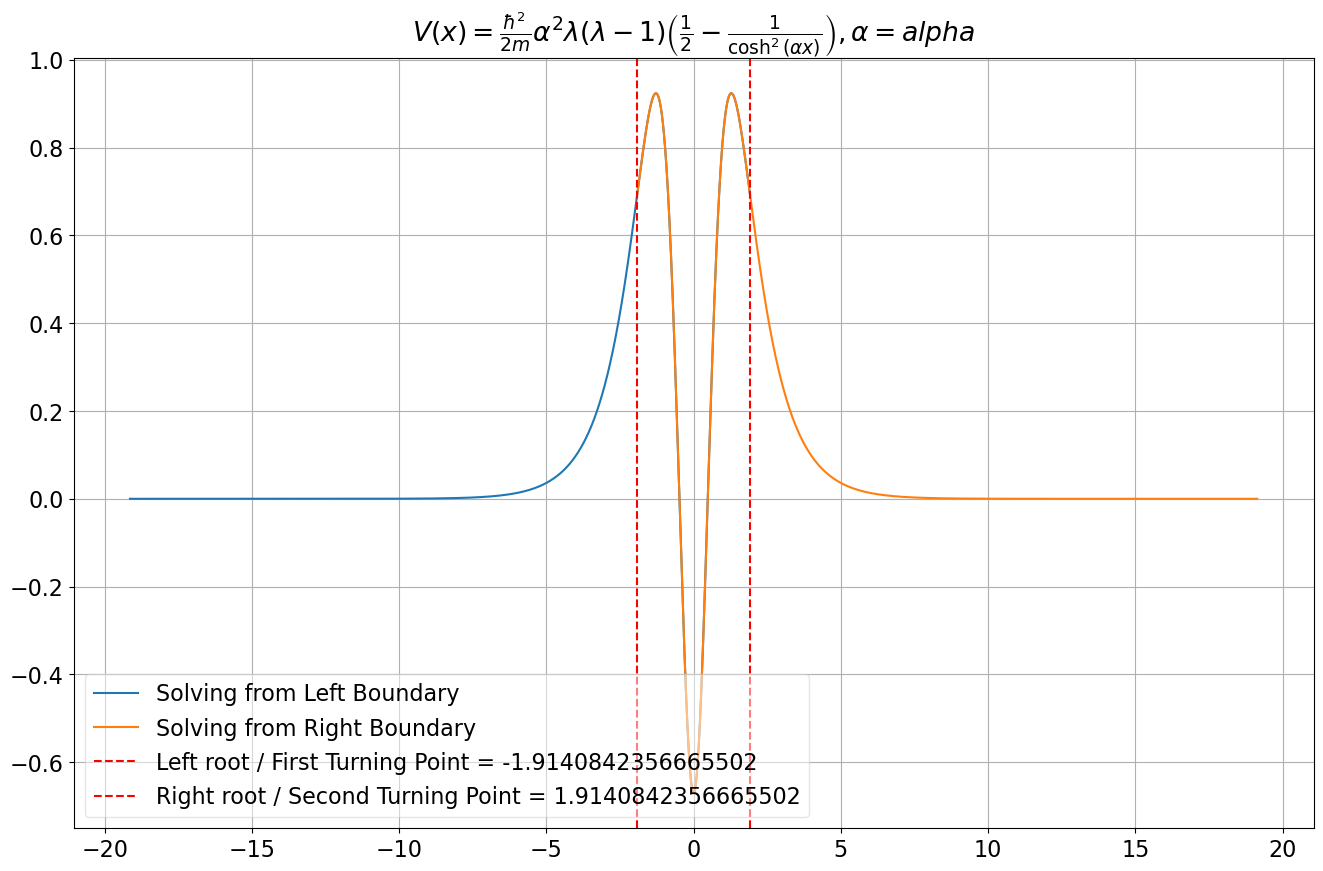

In [663]:
n = int((x_2nd_turning_point - x_far_left) / h)
x = np.linspace(x_far_left, x_2nd_turning_point, n + 1) # x must be first

# Using Numerov method to iterate the wavefunction, from the left boundary to the first turning point
def Numerov_left(y_left, h, E_x, V_x):
    k2 = k_squared(E_x, V_x)
    y = np.zeros(n + 1)
    y[0] = y_left
    y[1] = y_left + 1e-10
    for i in range (1, n):
        y[i + 1] = (y[i] * (2 + 10 / 12 * h ** 2 * k2[i]) - y[i - 1] * (1 - h ** 2 / 12 * k2[i - 1])) / (1 - h **2 / 12 * k2[i + 1])
    return y

Total_points_Left = Numerov_left(y_far_left, h, E_x, V(x))
plt.plot(x, Total_points_Left, label = 'Solving from Left Boundary')


n = int((x_far_right - x_1st_turning_point) / h)
x = np.linspace(x_1st_turning_point, x_far_right, n + 1)

# Using Numerov method to iterate the wavefunction, from the right boundary to the second turning point
def Numerov_right(y_right, h, E_x, V_x):
    k2 = k_squared(E_x, V_x)
    y = np.zeros(n + 1)
    y[-1] = y_right
    y[-2] = y_right + 1e-10
    for i in range (1, n):
        y[-(i + 2)] = (y[-(i + 1)] * (2 + 10 / 12 * h ** 2 * k2[-(i + 1)]) - y[-i] * (1 - h ** 2 / 12 * k2[-i])) / (1 - h **2 / 12 * k2[-(i + 2)])
    return y

# Solving from Right Boundary
Total_points_Right = Numerov_right(y_far_right, h, E_x, V(x))
plt.plot(x, Total_points_Right, label = 'Solving from Right Boundary')

# Aesthetic Modifications
plt.axvline(left_root, linestyle='--', color='red', label=f'Left root / First Turning Point = {left_root}')
plt.axvline(right_root, linestyle='--', color='red',  label=f'Right root / Second Turning Point = {right_root}')
plt.title(r'$V(x)=\frac{\hbar^2}{2m} \alpha^2 \lambda(\lambda-1)\left(\frac{1}{2}-\frac{1}{\cosh^2(\alpha x)}\right), \alpha ={alpha}$')
plt.legend()
plt.legend(framealpha=0.5, frameon=True)
plt.show()

As shown above, at the right eigenvalues, the shooting from the left overlaps with the shooting from the right exactly.

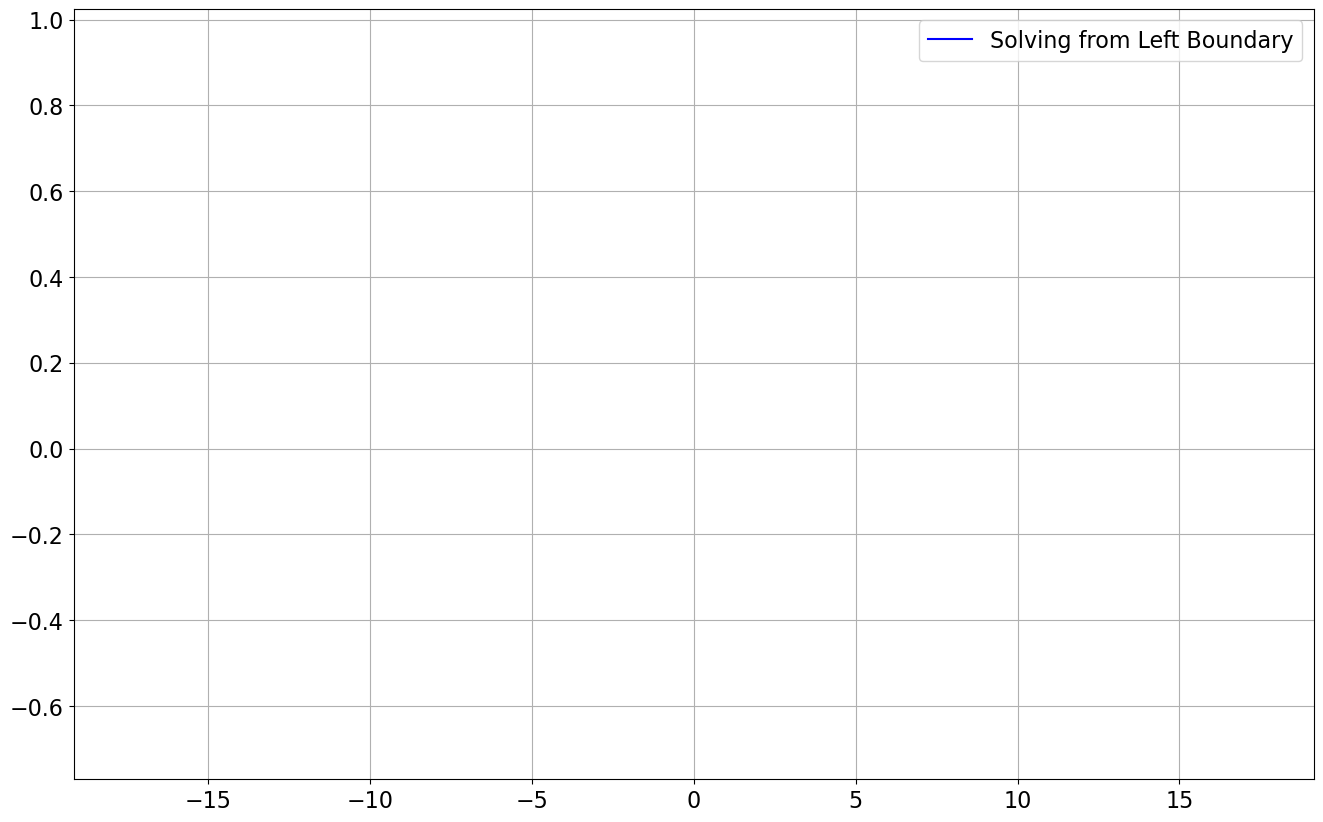

In [664]:
# Calculate data points
n = int((x_2nd_turning_point - x_far_left) / h)
x = np.linspace(x_far_left, x_2nd_turning_point, n + 1)
Total_points_Left = Numerov_left(y_far_left, h, E_x, V(x))

# Initialize the plot
fig, ax = plt.subplots()
leftline, = ax.plot(x[0], Total_points_Left[0], label='Solving from Left Boundary', color='blue')  # Corrected comma for unpacking
ax.set_xlim(x_far_left, x_far_right)
ax.set_ylim(np.min(Total_points_Left) - 0.1, np.max(Total_points_Left) + 0.1)
ax.legend()

# Update function
def update(frame):
    leftline.set_data(x[:frame], Total_points_Left[:frame])  # Update data for the line
    return leftline,

# Animation (ensure ani persists)
ani = FuncAnimation(fig=fig, func=update, frames=len(x), interval=50, blit=True)  # Corrected interval and added blit
plt.show()

In [665]:
n_overall = int((x_far_right - x_far_left) / h)
n_turning = int((x_1st_turning_point - x_far_left) / h)
#print('total points =', n_overall, ', total points from far left to 1st turning point =', n_turning)

x = np.linspace(x_far_left, x_far_right, n_overall + 1)

#print(Numerov_left(y_far_left, h, E_x, V(x))[n_turning - 1])
#print(Numerov_left(y_far_left, h, E_x, V(x))[n_turning])
#print(Numerov_left(y_far_left, h, E_x, V(x))[n_turning + 1])
#print(Numerov_right(y_far_right, h, E_x, V(x))[0])
#print(Numerov_right(y_far_right, h, E_x, V(x))[1])
#print(Numerov_right(y_far_right, h, E_x, V(x))[2])

def g_E(E):
    return ((Numerov_left(y_far_left, h, E, V(x))[n_turning + 1] - Numerov_left(y_far_left, h, E, V(x))[n_turning - 1]) - (Numerov_right(y_far_right, h, E, V(x))[2] - Numerov_right(y_far_right, h, E, V(x))[0])) / (2 * h * Numerov_left(y_far_left, h, E, V(x))[n_turning])

print(f'f({E})=', g_E(E_x))

f(<function E at 0x0000021C84CD7F60>)= 3.522500214787293e-06


Now, we iterate the function below to find the exact value of E:

\begin{aligned} f\left(E\right)=\frac{\left[\psi_l\left(x_r+h\right)-\psi_l\left(x_r-h\right)\right]-\left[\psi_r\left(x_r+h\right)-\psi_r\left(x_r-h\right)\right]}{2h\psi\left(x_r\right)}=0 \end{aligned}

We take the first turning point as our reference.

In [666]:
def f_E(E):
    def k_squared(E, V):
        return -2 * m / hbar ** 2 * (E - V)
    # Define the bisection method
    def b_m(f, a, b, E, tol, max_iter):
        if f(a, E) * f(b, E) > 0:
            raise ValueError('Function has same signs at both endpoints of the interval.')
        i = 1
        while (b - a) / 2 > tol and i < max_iter:
            c = (a + b) / 2
            fc = f(c, E)
            if fc * f(a, E) < 0:
                b = c
            elif fc * f(b, E) < 0:
                a = c
            elif fc == 0:  # Exact root found
                return c, i
            i += 1

        # Final midpoint and iteration count
        c = (a + b) / 2
        return c, i

    # Function for turning points (E - V(x))
    def f(x, E):  # f(x) = E - V(x)
        return E - V(x)

    # Debugging helper: Check function values
    def debug_bracketing(f, a, b, E):
        fa = f(a, E)
        fb = f(b, E)
        #print(f"f(a={a}) = {fa}, f(b={b}) = {fb}")
        if fa * fb > 0:
            print("No root is bracketed in the given interval. Adjust 'a' and 'b'.")
        return fa, fb

    # Parameters
    a = 0
    b = 15 / alpha
    tol = 1e-15
    max_iter = 1000

    # Debugging: Check initial bracketing
    fa, fb = debug_bracketing(f, a, b, E)
    if fa * fb > 0:
        raise ValueError("Adjust the range [a, b] to bracket the root.")

    # Finding the root
    right_root, iterations = b_m(f, a, b, E, tol, max_iter)
    left_root = -right_root # Note: only for symmetric potentials

    #print("Approximate left root:", left_root)
    #print("Approximate right root:", right_root)
    #print("Number of iterations:", iterations)
    #---------------------------------------------------------------------------------------------------------------------------
    # Setting the coordinates for the shooting method
    midpoint = (right_root + left_root) / 2
    width = (right_root - left_root) / 2

    x_far_left = midpoint - 10 * width # Far left side, psi approaches to zero
    x_1st_turning_point = left_root # First turning point
    x_2nd_turning_point = right_root # Second turning point
    x_far_right = midpoint + 10 * width # Far right side , psi approaches to zero

    y_far_left, y_far_right = 0, 0 # Initial values
    #---------------------------------------------------------------------------------------------------------------------------
    # Setting the interval to be constant
    n = 20000
    h = (x_far_right - x_far_left) / n # Step size
    #---------------------------------------------------------------------------------------------------------------------------
    # Using Numerov method to iterate the wavefunction, from the left boundary to the first turning point
    n = int((x_1st_turning_point - x_far_left) / h)
    x = np.linspace(x_far_left, x_1st_turning_point + h, n + 2) # x must be first

    def Numerov_left(y_left, h, E, V_x):
        k2 = k_squared(E, V_x)
        y = np.zeros(n + 2)
        y[0] = y_left
        y[1] = y_left + 1e-10
        for i in range (1, n + 1):
            y[i + 1] = (y[i] * (2 + 10 / 12 * h ** 2 * k2[i]) - y[i - 1] * (1 - h ** 2 / 12 * k2[i - 1])) / (1 - h **2 / 12 * k2[i + 1])
        return y

    Left_points = Numerov_left(y_far_left, h, E, V(x))

    #print('Left Boundary')
    #for i in range(0, 3):
        #print(f'Point {i}',
            #x[i],
            #',',
            #Left_points[i]
        #)   

    #print('---------------------------------------')
    
    #print('1st Turning Point')
    #for i in range(1, 4):
        #print(f'Point {n - i + 2}',
            #x[-i],
            #',',
            #Left_points[-i]
        #)
        
    #print('---------------------------------------')
    #print('Turning Point = Point', n)
    #---------------------------------------------------------------------------------------------------------------------------
    # Using Numerov method to iterate the wavefunction, from the right boundary to the second turning point
    n = int((x_far_right - x_1st_turning_point) / h)
    x = np.linspace(x_1st_turning_point - h, x_far_right, n + 2)

    def Numerov_right(y_right, h, E, V_x):
        k2 = k_squared(E, V_x)
        y = np.zeros(n + 2)
        y[-1] = y_right
        y[-2] = y_right + 1e-10
        for i in range (1, n + 1):
            y[-(i + 2)] = (y[-(i + 1)] * (2 + 10 / 12 * h ** 2 * k2[-(i + 1)]) - y[-i] * (1 - h ** 2 / 12 * k2[-i])) / (1 - h **2 / 12 * k2[-(i + 2)])
        return y

    Right_points = Numerov_right(y_far_right, h, E, V(x))

    #print('1st Turning Point')
    #for i in range(0, 3):
        #print(f'Point {i - 1}',
            #x[i],
            #',',
            #Right_points[i]
        #)
        
    #print('---------------------------------------')
        
    #print('Right Boundary')
    #for i in range(0, 3):
        #print(f'Point {n - i}',
            #x[n - i + 1],
            #',',
            #Right_points[n - i + 1]
        #)

    #print('---------------------------------------')   
    #---------------------------------------------------------------------------------------------------------------------------
    n_overall = int((x_far_right - x_far_left) / h)
    n_turning = int((x_1st_turning_point - x_far_left) / h)
    #print('total points =', n_overall, ', total points from far left to 1st turning point =', n_turning)

    x = np.linspace(x_far_left, x_far_right, n_overall + 1)


    #print(Numerov_left(y_far_left, h, E, V(x))[n_turning - 1])
    #print(Numerov_left(y_far_left, h, E, V(x))[n_turning])
    #print(Numerov_left(y_far_left, h, E, V(x))[n_turning + 1])
    #print(Numerov_right(y_far_right, h, E, V(x))[0])
    #print(Numerov_right(y_far_right, h, E, V(x))[1])
    #print(Numerov_right(y_far_right, h, E, V(x))[2])
    return ((Numerov_left(y_far_left, h, E, V(x))[n_turning + 1] - Numerov_left(y_far_left, h, E, V(x))[n_turning - 1]) - (Numerov_right(y_far_right, h, E, V(x))[2] - Numerov_right(y_far_right, h, E, V(x))[0])) / (2 * h * Numerov_left(y_far_left, h, E, V(x))[n_turning])

E = 2.5
print(f'f({E})=', f_E(E))


f(2.5)= -2.49886540723714e-11


Having obtained the function of $f\left(E\right)$, we use Bisection Method to iterate the root

In [667]:
# Define the bisection method
def b_m(f, a, b, tol, max_iter):
    if f(a) * f(b) > 0:
        raise ValueError('Function has same signs at both endpoints of the interval.')
    i = 1
    while (b - a) / 2 > tol and i < max_iter:
        c = (a + b) / 2
        fc = f(c)
        if fc * f(a) < 0:
            b = c
        elif fc * f(b) < 0:
            a = c
        elif fc == 0:  # Exact root found
            return c, i
        i += 1

    # Final midpoint and iteration count
    c = (a + b) / 2
    return c, i

def f(E):
    return f_E(E)

# Check function values
def debug_bracketing(f, a, b):
    fa = f(a)
    fb = f(b)
    print(f"f(a={a}) = {fa}, f(b={b}) = {fb}")
    if fa * fb > 0:
        print("No root is bracketed in the given interval. Adjust 'a' and 'b'.")
    return fa, fb

# Parameters
a = 2
b = 2.9
tol = 1e-10
max_iter = 100

# Debugging: Check initial bracketing
fa, fb = debug_bracketing(f, a, b)
if fa * fb > 0:
    raise ValueError("Adjust the range [a, b] to bracket the root.")

# Finding the root
Approximate_E = b_m(f, a, b, tol, max_iter)

print("Approximate E:", f'{Approximate_E[0]:.10f}')
print("Number of iterations:", Approximate_E[1])


f(a=2) = 2.849143595717586, f(b=2.9) = -0.8758559911433352
Approximate E: 2.4999999970
Number of iterations: 34


Which shows us that one of the eigenvalues is $2.5$, equal to the exact expression for $n=2$.